In [30]:
import requests 
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as ps
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import matplotlib.pyplot as mt
import pandas as ps
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(7) # seeding random number generator
import seaborn as sns

mt.style.use('ggplot')

import nltk

In [46]:
product_name = input("Enter Your product: ")

Enter Your product: vu


In [47]:
page_url="https://www.flipkart.com/search?q={}".format(product_name)
scrap_pageno=requests.get(page_url).text
page_web=bs(scrap_pageno)

In [48]:
page_web.find_all("div",class_="_2MImiq")[0].find("span").text.split()[3]

'2'

In [49]:
page_url="https://www.flipkart.com/search?q={}".format(product_name)
scrap_pageno=requests.get(page_url).text
page_web=bs(scrap_pageno)
try:
    page_no=int(page_web.find_all("div",class_="_2MImiq")[0].find("span").text.split()[3])
    
except Exception as e:
    a=page_web.find_all("div",class_="_2MImiq")[0].find("span").text.split()[3].split(",")
    page_no=int(a[0]+a[1])

In [50]:
page_no

2

In [52]:
import requests
from bs4 import BeautifulSoup as bs

final_links = []
reviews = []
product_title = []

for i in range(1, page_no + 1):
    url = "https://www.flipkart.com/search?q={}&page={}".format(product_name, i)
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36"
    }
    webpage = requests.get(url, headers=headers).text
    scrap = requests.get(url).text
    web = bs(scrap)
    
    for j in web.find_all("a", class_="_1fQZEK"):
        link = "https://www.flipkart.com" + j.get("href")
        link = link.replace("/p/", "/product-reviews/")
        final_links.append(link)
else:
    for k in final_links:
        product_page = requests.get(k).text
        page_web = bs(product_page)
        test = page_web.find_all("div", class_="_2MImiq _1Qnn1K")
        
        if len(test) > 0:
            try:
                pro_page_no = int(page_web.find_all("div", class_="_2MImiq _1Qnn1K")[0].find("span").text.split()[3])
            except Exception as e:
                pro_ex = page_web.find_all("div", class_="_2MImiq _1Qnn1K")[0].find("span").text.split()[3].split(",")
                pro_page_no = int(pro_ex[0] + pro_ex[1])
        else:
            pro_page_no = 1
        
        for t in range(1):
            scrap = requests.get(k + "&page={}".format(t)).text
            pro_web = bs(scrap)
            
            for l in pro_web.find_all("p", class_="_2-N8zT"):
                reviews.append(l.text)
                try:
                    product_title.append(pro_web.find("div", class_="_2s4DIt _1CDdy2").text)
                except:
                    product_title.append("no name")

In [53]:
pro_web.find("div",class_="_2s4DIt _1CDdy2")

<div class="_2s4DIt _1CDdy2">Vu Premium 108 cm (43 inch) Full HD LED Smart Linux TV Reviews</div>

In [54]:
len(reviews)

0

In [55]:
len(product_title)

0

In [43]:
import pandas as ps
fd=ps.DataFrame({"product_title":product_title,"reviews":reviews})
fd.head()

,product_title,reviews
0,Primebook 4G Android Based MediaTek MT8788 - (...,Simply awesome
1,Primebook 4G Android Based MediaTek MT8788 - (...,Terrific
2,Primebook 4G Android Based MediaTek MT8788 - (...,Awesome
3,Primebook 4G Android Based MediaTek MT8788 - (...,Worth every penny
4,Primebook 4G Android Based MediaTek MT8788 - (...,Very Good


In [44]:
fd.to_csv(r"C:\Users\Harshit\Downloads\laptops.csv")

In [33]:
fd.to_csv(r"C:\Users\Harshit\Downloads\jabbaaaa.csv")

In [78]:
fd.to_csv(r"C:\Users\Harshit\Downloads\washing_machines.csv")

In [28]:
fd.to_csv(r"C:\Users\Harshit\Downloads\mi_mobiles.csv")

In [ ]:
fd.to_csv(r"C:\Users\Harshit\Downloads\iphone_1.csv")

In [ ]:
fd.to_csv(r"C:\Users\Harshit\Downloads\oneplusmobile.csv")

In [ ]:
fd.to_csv(r"C:\Users\Harshit\Downloads\iphone.csv")

In [ ]:
fd.to_csv(r"C:\Users\Harshit\Downloads\samsungtv.csv")

In [110]:
ps.set_option("display.max_rows",None)

In [31]:
df=ps.read_csv(r"C:\Users\Harshit\Downloads\washing_machines.csv")
df.head()

,Unnamed: 0,product_title,reviews
0,0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!
1,1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
2,2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
3,3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny
4,4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!


In [32]:
df1=ps.read_csv(r"C:\Users\Harshit\Downloads\iphone_1.csv")
df1.head()

,Unnamed: 0,product_title,reviews
0,0,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Mind-blowing purchase
1,1,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Very Good
2,2,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Best in the market!
3,3,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Excellent
4,4,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Brilliant


In [33]:
df2=ps.read_csv(r"C:\Users\Harshit\Downloads\mi_mobiles.csv")
df2.head()

,Unnamed: 0,product_title,reviews
0,0,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Nice product
1,1,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Nice product
2,2,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Nice
3,3,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Delightful
4,4,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Moderate


In [34]:
df3=ps.read_csv(r"C:\Users\Harshit\Downloads\oneplusmobile.csv")
df3.head()

,Unnamed: 0,product_title,reviews
0,0,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Must buy!
1,1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Delightful
2,2,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Nice product
3,3,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Decent product
4,4,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Nice product


In [35]:
df4=ps.read_csv(r"C:\Users\Harshit\Downloads\iphone.csv")
df4.head()

,Unnamed: 0,product_title,reviews
0,0,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Perfect product!
1,1,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Perfect product!
2,2,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Excellent
3,3,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Brilliant
4,4,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Fabulous!


In [36]:
df5=ps.read_csv(r"C:\Users\Harshit\Downloads\samsungtv.csv")
df5.head()

,Unnamed: 0,product_title,reviews
0,0,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,Perfect product!
1,1,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,Perfect product!
2,2,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,Awesome
3,3,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,Super!
4,4,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,Good quality product


In [37]:
df6=ps.read_csv(r"C:\Users\Harshit\Downloads\jabbaaaa.csv")
df6.head()

,Unnamed: 0,product_title,reviews
0,0,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Perfect product!
1,1,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Perfect product!
2,2,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Brilliant
3,3,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Excellent
4,4,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Fabulous!


In [38]:
df7=ps.read_csv(r"C:\Users\Harshit\Downloads\laptops.csv")
df7.head(10)

,Unnamed: 0,product_title,reviews
0,0,Primebook 4G Android Based MediaTek MT8788 - (...,Simply awesome
1,1,Primebook 4G Android Based MediaTek MT8788 - (...,Terrific
2,2,Primebook 4G Android Based MediaTek MT8788 - (...,Awesome
3,3,Primebook 4G Android Based MediaTek MT8788 - (...,Worth every penny
4,4,Primebook 4G Android Based MediaTek MT8788 - (...,Very Good
5,5,Primebook 4G Android Based MediaTek MT8788 - (...,Fabulous!
6,6,Primebook 4G Android Based MediaTek MT8788 - (...,Terrific
7,7,Primebook 4G Android Based MediaTek MT8788 - (...,Super!
8,8,Primebook 4G Android Based MediaTek MT8788 - (...,Must buy!
9,9,Primebook 4G Android Based MediaTek MT8788 - (...,Awesome


In [39]:
fd=ps.concat([df, df1, df2, df3, df4,df5,df6,df7],ignore_index=True)
fd.head(20)

,Unnamed: 0,product_title,reviews
0,0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!
1,1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
2,2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
3,3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny
4,4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!
5,5,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
6,6,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Awesome
7,7,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Mind-blowing purchase
8,8,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
9,9,no name,Perfect product!


In [40]:
fd.reset_index(inplace=True)

In [41]:
fd.head()

,index,Unnamed: 0,product_title,reviews
0,0,0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!
1,1,1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
2,2,2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
3,3,3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny
4,4,4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!


In [42]:
fd.set_index(["Unnamed: 0"], inplace = True,
                    append = True, drop = True)

In [43]:
fd.reset_index(inplace = True)

In [44]:
fd.shape

(113220, 5)

In [45]:
fd.drop(["Unnamed: 0"],axis=1,inplace=True)

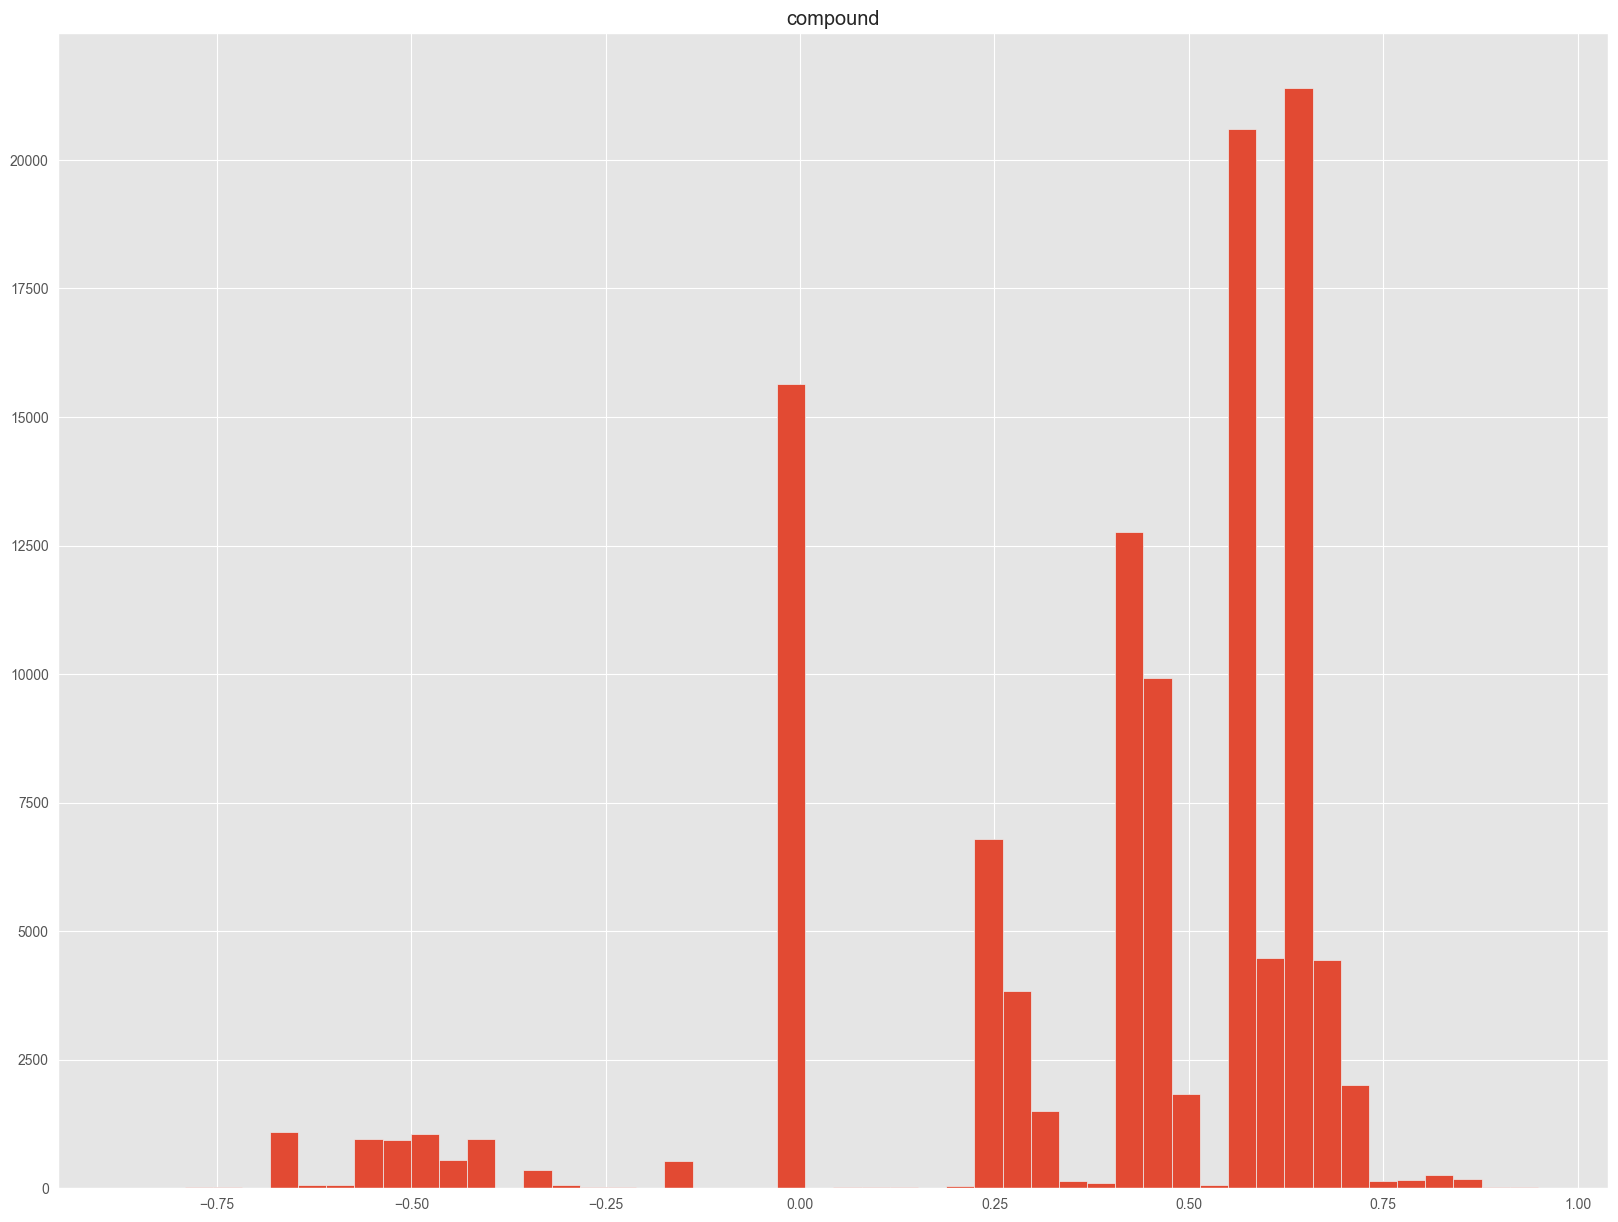

In [127]:
fd.hist(bins=50, figsize=(20,15))
mt.show()

In [47]:
example = fd['reviews'][50]
print(example)

Good choice


In [48]:
fd['reviews']

0         Best in the market!
1               Great product
2                      Super!
3           Worth every penny
4                   Just wow!
                 ...         
113215              Excellent
113216         Simply awesome
113217              Wonderful
113218      Terrific purchase
113219              Brilliant
Name: reviews, Length: 113220, dtype: object

In [49]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Good', 'choice']

In [50]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Good', 'JJ'), ('choice', 'NN')]

In [51]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S (GPE Good/JJ) choice/NN)


In [52]:
fd.head()

,level_0,index,product_title,reviews
0,0,0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!
1,1,1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
2,2,2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
3,3,3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny
4,4,4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!


In [53]:
fd.drop(["level_0","index"],axis=1,inplace=True)

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [55]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [56]:
sia.polarity_scores(fd.iloc[0]['reviews'])

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.6696}

In [57]:
fd["reviews"].value_counts()

reviews
Wonderful                                                5630
Must buy!                                                4326
Fabulous!                                                4319
Brilliant                                                4282
Classy product                                           4280
                                                         ... 
Washing machine                                             1
Nice Product and stands out from others in this range       1
Not a good experience                                       1
Performance of the washing machine.                         1
VFM product                                                 1
Name: count, Length: 1690, dtype: int64

In [58]:
fd.iloc[8]['reviews']

'Great product'

In [59]:
fd['scores'] = fd['reviews'].apply(lambda reviews: sia.polarity_scores(reviews) if not isinstance(reviews, float) else None)

fd.head()

,product_title,reviews,scores
0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound..."
1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp..."
4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."


In [60]:
fd.shape

(113220, 3)

In [61]:
fd['reviews']=="no name"

0         False
1         False
2         False
3         False
4         False
          ...  
113215    False
113216    False
113217    False
113218    False
113219    False
Name: reviews, Length: 113220, dtype: bool

In [62]:
fd['compound'] = fd['scores'].apply(lambda score_dict: score_dict['compound'] if score_dict is not None else None)
fd.head()

,product_title,reviews,scores,compound
0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.6696
1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249
2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360
3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.2263
4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6239


In [63]:
fd['comp_score'] = fd['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

fd.head(10)

,product_title,reviews,scores,compound,comp_score
0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.6696,pos
1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos
2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360,pos
3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.2263,pos
4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6239,pos
5,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360,pos
6,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Awesome,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6249,pos
7,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Mind-blowing purchase,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
8,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos
9,no name,Perfect product!,"{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound...",0.6114,pos


In [64]:
fd.comp_score.value_counts()

comp_score
pos    106394
neg      6826
Name: count, dtype: int64

In [42]:
364/20710
# we can see that barely 1% review are neg so almost 99% percent reviews are positive so it is a matter of data imbalance

0.017576050217286334

In [65]:
fd.head()

,product_title,reviews,scores,compound,comp_score
0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.6696,pos
1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos
2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360,pos
3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.2263,pos
4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6239,pos


In [66]:
fd.isnull().sum()/len(fd)*100

product_title    0.000000
reviews          0.005299
scores           0.005299
compound         0.005299
comp_score       0.000000
dtype: float64

In [67]:
fd.dropna(subset=['reviews', 'scores', 'compound'], inplace=True)

In [68]:
fd.describe()

,compound
count,113214.000000
mean,0.390910
std,0.309723
min,-0.863300
25%,0.226300
50%,0.476700
75%,0.623900
max,0.949100


In [69]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113214 entries, 0 to 113219
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_title  113214 non-null  object 
 1   reviews        113214 non-null  object 
 2   scores         113214 non-null  object 
 3   compound       113214 non-null  float64
 4   comp_score     113214 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.2+ MB


In [70]:
fd.groupby('comp_score').describe()

compound                                                      \
               count      mean       std     min     25%     50%     75%   
comp_score                                                                 
neg           6820.0 -0.476506  0.141838 -0.8633 -0.5423 -0.4767 -0.4228   
pos         106394.0  0.446513  0.222408  0.0000  0.3182  0.5707  0.6239   

                    
               max  
comp_score          
neg        -0.0127  
pos         0.9491

In [71]:
fd_neg = fd[fd['comp_score']=='neg']
fd_neg.shape

(6820, 5)

In [72]:
fd_pos = fd[fd['comp_score']=='pos']
fd_pos.shape

(106394, 5)

In [73]:
fd_pos_downsampled = fd_pos.sample(fd_neg.shape[0])
fd_pos_downsampled.shape

(6820, 5)

In [74]:
fd_balanced = ps.concat([fd_pos_downsampled, fd_neg])
fd_balanced.shape

(13640, 5)

In [75]:
fd_balanced['comp_score'].value_counts()

comp_score
pos    6820
neg    6820
Name: count, dtype: int64

In [76]:
fd_balanced['neg']=fd_balanced['comp_score'].apply(lambda x: 1 if x=='neg' else 0)
fd_balanced.sample(10)

,product_title,reviews,scores,compound,comp_score,neg
100107,"APPLE iPhone X (Silver, 256 GB) Reviews","Not worth more than 60k, only buy during sale ...","{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...",-0.1695,neg,1
16465,Whirlpool 7.5 kg Fully Automatic Top Load Wash...,Utterly Disappointed,"{'neg': 0.772, 'neu': 0.228, 'pos': 0.0, 'comp...",-0.5256,neg,1
60440,"Redmi 2 Prime (Grey, 16 GB) Reviews",Superb Value for Money!,"{'neg': 0.0, 'neu': 0.227, 'pos': 0.773, 'comp...",0.7777,pos,0
35329,"Redmi Note 11 PRO Plus 5G (Phantom White, 128 ...",Hated it!,"{'neg': 0.818, 'neu': 0.182, 'pos': 0.0, 'comp...",-0.6696,neg,1
43489,"REDMI 11 Prime (Peppy Purple, 64 GB) Reviews",Hated it!,"{'neg': 0.818, 'neu': 0.182, 'pos': 0.0, 'comp...",-0.6696,neg,1
84947,"APPLE iPhone 14 (Starlight, 512 GB) Reviews",Simply awesome,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos,0
53588,itel MagicX Pro (4G Hotspot) Reviews,Useless product,"{'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'comp...",-0.4215,neg,1
43223,"REDMI 9 Activ (Carbon Black, 128 GB) Reviews",Very poor,"{'neg': 0.772, 'neu': 0.228, 'pos': 0.0, 'comp...",-0.5256,neg,1
39627,"Redmi Note 5 (Rose Gold, 64 GB) Reviews",Perfect product!,"{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound...",0.6114,pos,0
70708,"REDMI Note 10 Pro Max (Vintage Bronze, 128 GB)...",Good choice,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,pos,0


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fd_balanced['reviews'],fd_balanced['neg'], stratify=fd_balanced['neg'])

In [80]:
X_train.head(4)

105980    Really Nice
4151        Just wow!
57126     Bad quality
51061       Very poor
Name: reviews, dtype: object

In [84]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [85]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Odin, are you there?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351677, -0.5132725 , -0.8884572 , ..., -0.7474883 ,
        -0.75314724,  0.9196449 ],
       [-0.92416286, -0.293883  , -0.97128856, ..., -0.92767686,
        -0.6102466 ,  0.90782326]], dtype=float32)>

In [124]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "gautam adani",
    "elon musk",
    "bill gates",
    "narendra modi",
    "yogi adityanath"
]
)

In [125]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [126]:
cosine_similarity([e[0]],[e[3]])

array([[0.92163813]], dtype=float32)

In [90]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [91]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [92]:
len(X_train)

10230

In [93]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [105]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [106]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
320/320 [==============================] - 1291s 4s/step - loss: 0.5794 - accuracy: 0.7422 - precision: 0.7388 - recall: 0.7494
Epoch 2/10
320/320 [==============================] - 1263s 4s/step - loss: 0.4170 - accuracy: 0.8999 - precision: 0.8838 - recall: 0.9208
Epoch 3/10
320/320 [==============================] - 1289s 4s/step - loss: 0.3327 - accuracy: 0.9385 - precision: 0.9219 - recall: 0.9582
Epoch 4/10
320/320 [==============================] - 1270s 4s/step - loss: 0.2818 - accuracy: 0.9481 - precision: 0.9323 - recall: 0.9664
Epoch 5/10
320/320 [==============================] - 1250s 4s/step - loss: 0.2456 - accuracy: 0.9556 - precision: 0.9421 - recall: 0.9709
Epoch 6/10
320/320 [==============================] - 1285s 4s/step - loss: 0.2207 - accuracy: 0.9589 - precision: 0.9460 - recall: 0.9734
Epoch 7/10
320/320 [==============================] - 1250s 4s/step - loss: 0.2026 - accuracy: 0.9621 - precision: 0.9534 - recall: 0.9717
Epoch 8/10
320/320 [=======

In [109]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

model.evaluate(X_test, y_test)

107/107 [==============================] - 423s 4s/step - loss: 0.1382 - accuracy: 0.9689 - precision: 0.9624 - recall: 0.9760


[0.1382351815700531,
 0.9689149856567383,
 0.9624060392379761,
 0.9759531021118164]

In [111]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

107/107 [==============================] - 421s 4s/step


In [112]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 0, ..., 0, 1, 1])

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[1640,   65],
       [  41, 1664]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

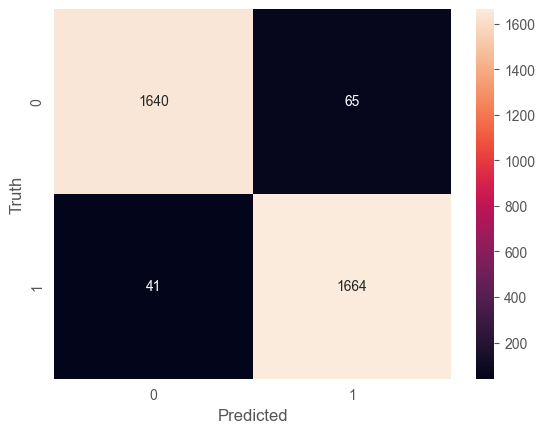

In [114]:
sns.heatmap(cm, annot=True, fmt='d')
mt.xlabel('Predicted')
mt.ylabel('Truth')

In [115]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1705
           1       0.96      0.98      0.97      1705

    accuracy                           0.97      3410
   macro avg       0.97      0.97      0.97      3410
weighted avg       0.97      0.97      0.97      3410



In [123]:
reviews = [
    "Utterly Disappointed",
    "Worst Product i have ever seen",
    "Worth Purchase",
    "Super!",
    "Making shopping feel like a punishment.",
    "Where your orders go to vanish into thin air",
    "Excellent quality and durability, worth every penny!",
    "Sleek design and leak-proof, perfect for on-the-go hydration.",
    "Lightweight and compact, fits perfectly in my bag or backpack."
]
model.predict(reviews)

1/1 [==============================] - 1s 1s/step


array([[0.93466455],
       [0.98716176],
       [0.45358518],
       [0.0074071 ],
       [0.34660605],
       [0.886345  ],
       [0.19200383],
       [0.04628715],
       [0.07861082]], dtype=float32)